<a href="https://colab.research.google.com/github/tripathiosho/ImportantNotebooks/blob/main/KNN_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 41.6MB/s]


In [ ]:
df=pd.read_csv('multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [ ]:
df['class'].value_counts()

,count
class,
2,180
3,173
1,87


In [ ]:
X=df[['Region', 'Fresh',    'Milk', 'Grocery',  'Frozen',   'Detergents_Paper', 'Delicassen'    ]].copy()
y=df[['class']].copy()


In [ ]:
X.shape

(440, 7)

In [ ]:
y.shape

(440, 1)

In [ ]:
# for this data i would need visualization power of 8 D

#find a way to make it visible in 2D

# JUST FOR VISIALIZATION PURPOSE PCA

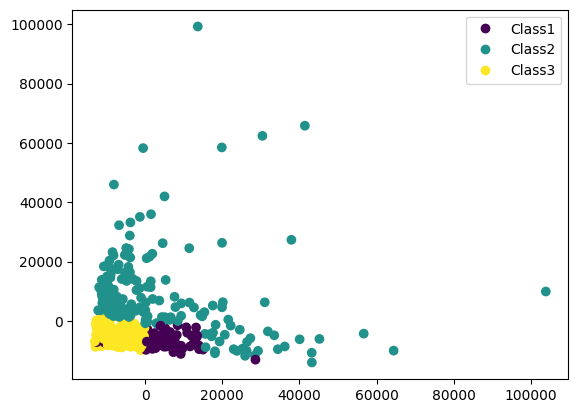

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


def scatter_visualize(visualize1,visualize2,y_label):
  scatter = plt.scatter(visualize[:,0] ,visualize[:,1],c = y.values[:,0] )
  plt.legend(handles=scatter.legend_elements()[0], labels=['Class1','Class2','Class3'])
  plt.show()

# reducing features to just 2 features for visualization purpose
pca = PCA(n_components=2)
visualize = pca.fit_transform(X)


scatter_visualize(visualize[:,0] ,visualize[:,1],y.values[:,0])

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.25, random_state=42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(247, 7) (247, 1)
(83, 7) (83, 1)
(110, 7) (110, 1)


In [ ]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()

X_sm, y_sm = smt.fit_resample(X_train, y_train)

y_sm.value_counts()

,count
class,
1,99
2,99
3,99


In [ ]:
from sklearn.preprocessing import StandardScaler

st =  StandardScaler()

X_sm = st.fit_transform(X_sm.values)
X_val_scaled = st.transform(X_val.values)
X_test_scaled = st.transform(X_test.values)

y_sm = y_sm.values[:,0]
y_val = y_val.values[:,0]
y_test = y_test.values[:,0]

In [ ]:
#KNN implementation from scratch

X_val_scaled[50]

array([ 0.67120633, -0.59972021, -0.43814728, -0.65585745, -0.28349713,
       -0.50967537, -0.27179174])

In [ ]:
dist = np.sqrt(np.sum((X_sm - X_val_scaled[50])**2, axis=1))

In [ ]:
dist.shape

(297,)

In [ ]:
#I WANT THE LABELS WITH THE DISTANCE THAT WE HAVE CALCULATED


y_sm

array([2, 1, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 3, 1, 1, 1, 2, 1, 3, 2, 1,
       2, 3, 3, 3, 3, 3, 2, 1, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2,
       1, 2, 1, 3, 3, 1, 3, 3, 2, 2, 2, 3, 1, 3, 2, 1, 1, 1, 2, 1, 3, 2,
       3, 3, 2, 3, 1, 3, 2, 2, 1, 3, 3, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2,
       3, 3, 2, 3, 3, 2, 1, 2, 2, 1, 3, 2, 1, 2, 1, 3, 2, 1, 1, 1, 2, 3,
       3, 2, 3, 2, 1, 2, 3, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 3, 2, 2, 3,
       2, 3, 1, 3, 1, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3, 1, 2, 1, 1,
       1, 3, 1, 1, 2, 3, 3, 3, 3, 2, 1, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 2,
       2, 2, 1, 1, 1, 2, 3, 1, 3, 2, 3, 2, 3, 3, 1, 2, 2, 3, 2, 2, 3, 1,
       1, 3, 3, 2, 3, 3, 1, 2, 3, 1, 3, 1, 3, 2, 2, 2, 3, 1, 3, 1, 1, 2,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 2, 2, 2, 3, 2, 1, 3, 1, 2, 3, 2, 2,
       3, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2])

In [ ]:
dist

array([ 2.82871065,  1.17390623,  3.94621561,  1.27954885,  0.71249695,
        2.95676528,  0.72479827,  0.51938284,  2.1558501 ,  0.53180073,
        2.55891678,  3.05297554,  7.11557145,  0.50860293,  1.45999331,
        1.42488395,  1.66617727,  4.10409805,  0.86461449,  2.67265933,
       12.63151889,  0.94317083,  1.59823641,  0.30405039,  2.56338548,
        1.32123183,  1.48443007,  2.57873562,  2.07568913,  0.92567761,
        2.92676894,  2.9842166 ,  8.11003824,  0.30482054,  0.42011508,
        1.00182715,  0.70581031,  1.38738742,  2.07356091,  2.6440317 ,
        0.56872404,  1.4706505 ,  5.25141096,  2.54442647,  0.90111693,
        1.73365407,  2.16716135,  0.61864201,  1.08612162,  1.09771515,
        0.39799249,  1.8759431 ,  4.49811196,  5.17450565,  1.81274827,
        2.73503639,  1.51644929,  0.33016754,  1.8307557 ,  2.49541207,
        2.05773417,  1.98938865,  3.0626484 ,  1.2221128 ,  1.35846345,
        1.45819601,  2.71651165,  2.69103994,  5.34989084,  0.56

In [ ]:
distances= [(dist[i], y_sm[i]) for i in range (len(dist))]

In [ ]:
distances

[(np.float64(2.828710651754577), np.int64(2)),
 (np.float64(1.17390622748314), np.int64(1)),
 (np.float64(3.9462156119590555), np.int64(2)),
 (np.float64(1.2795488462786941), np.int64(3)),
 (np.float64(0.7124969505463383), np.int64(3)),
 (np.float64(2.9567652816692007), np.int64(2)),
 (np.float64(0.724798274826574), np.int64(3)),
 (np.float64(0.5193828377575481), np.int64(3)),
 (np.float64(2.155850103994385), np.int64(2)),
 (np.float64(0.5318007275061181), np.int64(3)),
 (np.float64(2.5589167757152778), np.int64(3)),
 (np.float64(3.052975538603786), np.int64(2)),
 (np.float64(7.115571454151625), np.int64(2)),
 (np.float64(0.5086029261441205), np.int64(3)),
 (np.float64(1.4599933126568059), np.int64(1)),
 (np.float64(1.4248839452787674), np.int64(1)),
 (np.float64(1.6661772741087286), np.int64(1)),
 (np.float64(4.104098053514254), np.int64(2)),
 (np.float64(0.8646144890684337), np.int64(1)),
 (np.float64(2.6726593304390374), np.int64(3)),
 (np.float64(12.63151888739302), np.int64(2)),
 

In [ ]:
# sort the distances 2 and 3

distances= sorted(distances)

In [ ]:
distances

[(np.float64(0.20442220106921966), np.int64(3)),
 (np.float64(0.2168153939640169), np.int64(3)),
 (np.float64(0.23192357416296897), np.int64(3)),
 (np.float64(0.2872722664472717), np.int64(3)),
 (np.float64(0.30405039345259965), np.int64(3)),
 (np.float64(0.3048205374566564), np.int64(3)),
 (np.float64(0.3301675378467456), np.int64(3)),
 (np.float64(0.33593607381535673), np.int64(3)),
 (np.float64(0.3455338264814194), np.int64(3)),
 (np.float64(0.36650195517220796), np.int64(3)),
 (np.float64(0.37031633301634753), np.int64(3)),
 (np.float64(0.37814558571232415), np.int64(3)),
 (np.float64(0.3794581114426704), np.int64(1)),
 (np.float64(0.3864549646084442), np.int64(3)),
 (np.float64(0.39799249211797083), np.int64(3)),
 (np.float64(0.41435336608455947), np.int64(3)),
 (np.float64(0.41542359951035784), np.int64(1)),
 (np.float64(0.42011508050738045), np.int64(3)),
 (np.float64(0.4458100627820551), np.int64(3)),
 (np.float64(0.45585736048346437), np.int64(3)),
 (np.float64(0.4929477435235

In [ ]:
distances = np.array(distances)

classes_counts = np.unique(dister[:,1],return_counts=True)
index_of_max_neighbour_class= classes_counts[1].argmax()

In [ ]:
#define k
k=5
dister = distances[:k]

In [ ]:
 dister

array([[0.2044222 , 3.        ],
       [0.21681539, 3.        ],
       [0.23192357, 3.        ],
       [0.28727227, 3.        ],
       [0.30405039, 3.        ]])

In [ ]:
class_counts= np.unique(dister[:,1], return_counts=True)

In [ ]:
index = class_counts[1].argmax()

In [ ]:
pred = class_counts [0][index]

In [ ]:
pred

np.float64(3.0)

In [ ]:
def knn(X,Y,queryPoint,k):
    """Predict the class label for the query point"""
    # Euclidean Distance
    dist = np.sqrt(np.sum((queryPoint-X)**2,axis=1) )

    # Storing distance and Class labels together
    distances = [(dist[i],Y[i]) for i in range(len(dist)) ]
    # sort the distances
    distances = sorted(distances)
    # Nearest/First K points
    distances = distances[:k]

    distances = np.array(distances)

    classes_counts = np.unique(distances[:,1],return_counts=True)

    index = classes_counts[1].argmax()
    pred = classes_counts[0][index]

    return int(pred),distances

In [ ]:
knn(X_sm,y_sm,X_val_scaled[1],10)

(2,
 array([[0.43455804, 2.        ],
        [0.66522245, 2.        ],
        [0.87368222, 2.        ],
        [0.97657044, 2.        ],
        [1.01465484, 2.        ],
        [1.14462755, 2.        ],
        [1.30947506, 2.        ],
        [1.36919375, 2.        ],
        [1.38129903, 2.        ],
        [1.40717303, 2.        ]]))

In [ ]:
y_pred = []

for i in range(X_test_scaled.shape[0]):
    output,_ = knn(X_sm, y_sm, X_test_scaled[i],5)
    y_pred.append(output)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           1       0.90      0.64      0.75        28
           2       0.74      0.95      0.83        37
           3       0.98      0.93      0.95        45

    accuracy                           0.86       110
   macro avg       0.87      0.84      0.85       110
weighted avg       0.88      0.86      0.86       110

